In [1]:
import pandas as pd
import numpy as np
import string
import nltk

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
tmp = pd.read_csv('/Users/syan/DataScience/test_codes/NLP/interview_dataset.csv', 
                  sep=',', error_bad_lines=False)

Skipping line 44: expected 4 fields, saw 8
Skipping line 45: expected 4 fields, saw 5
Skipping line 18798: expected 4 fields, saw 7
Skipping line 32145: expected 4 fields, saw 5
Skipping line 38888: expected 4 fields, saw 21
Skipping line 43707: expected 4 fields, saw 9
Skipping line 59495: expected 4 fields, saw 18
Skipping line 71979: expected 4 fields, saw 6
Skipping line 75651: expected 4 fields, saw 6
Skipping line 75864: expected 4 fields, saw 5
Skipping line 76298: expected 4 fields, saw 11
Skipping line 77021: expected 4 fields, saw 5
Skipping line 88982: expected 4 fields, saw 9
Skipping line 95139: expected 4 fields, saw 5
Skipping line 96523: expected 4 fields, saw 5
Skipping line 99169: expected 4 fields, saw 5
Skipping line 100664: expected 4 fields, saw 6
Skipping line 102151: expected 4 fields, saw 5
Skipping line 104137: expected 4 fields, saw 5
Skipping line 105744: expected 4 fields, saw 5
Skipping line 109188: expected 4 fields, saw 8

Skipping line 132555: expected 

In [3]:
tmp.shape

(171211, 4)

In [4]:
tmp.title.nunique()

96668

In [5]:
tmp.dropna(inplace=True)

### Cleasing data

In [6]:
tmp['title'] = tmp['title'].apply(lambda x: str(x).lower())

In [7]:
tmp['title'] = tmp['title'].apply(lambda x: str(x).translate(string.maketrans("",""), string.punctuation))

** n-grams **

In [8]:
cv = TfidfVectorizer(ngram_range=(1,3), max_df=0.8, min_df=100, 
                     stop_words=nltk.corpus.stopwords.words('english'), 
                     token_pattern=u'(?u)\\b\\w\\w\\w+\\b')
fitted_df = cv.fit_transform(tmp['title'])

In [9]:
token_name = cv.get_feature_names()

In [10]:
token_count = fitted_df.sum(axis=0)

In [11]:
len(token_name)

691

In [12]:
np.asarray(token_count.T)[:,0].shape

(691,)

In [13]:
new_df = pd.DataFrame(token_count.T, index=token_name, columns=['Count'])

In [14]:
new_df.sort_values('Count', ascending=False)[0:20]

,Count
manager,7716.837086
assistant,5614.344118
sales,3481.146175
engineer,3202.990894
director,3140.809282
intern,2835.416392
consultant,2701.986849
senior,2494.192750
associate,2334.439223
specialist,2095.676966


### Visualization

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

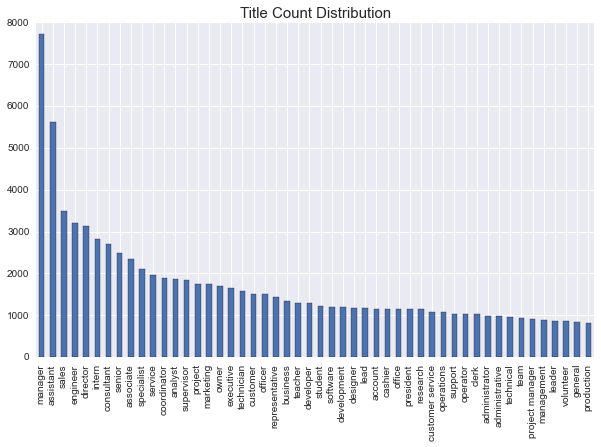

In [16]:
plt.figure(figsize=(10,6))
new_df.sort_values('Count', ascending=False)['Count'].head(50).plot(kind='bar')
plt.title('Title Count Distribution', fontsize=15)

### Nearest Neighbors

In [17]:
cov = fitted_df.T * fitted_df

In [18]:
from sklearn.cluster import SpectralClustering, KMeans

In [57]:
sc = SpectralClustering(n_jobs=6, affinity='precomputed')

In [58]:
sc.fit(1-dist)

/Users/syan/anaconda/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=8, n_init=10, n_jobs=6,
          n_neighbors=10, random_state=None)

In [62]:
silhouette_score(sample_df, sc.labels_)

0.06623775452251382

In [19]:
from sklearn.neighbors import NearestNeighbors

In [20]:
nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)

In [21]:
nn.fit(fitted_df)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

In [22]:
ind = 1300

In [23]:
tmp.iloc[ind]['title']

'staff photojournalist'

In [24]:
for ind in nn.kneighbors(fitted_df[ind])[1]:
    print tmp.iloc[ind]['title']

26639                      waitressbar staff
26158                    staff adminitrative
100358               rangers road tour staff
9720                             train staff
65219     caadac interneeoncall relief staff
38941                               qa staff
163243             staff assistantproduction
94729                                  staff
112122                          staff relief
131849                       staff appraiser
Name: title, dtype: object


### Cluster them via spectre clustering / K-mean

In [25]:
from sklearn.metrics import silhouette_score, mean_squared_error

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
reduced_df = pca.fit_transform(fitted_df.todense())

In [77]:
for n_clusters in range(2,15):
    km = KMeans(n_clusters=n_clusters, random_state=10, n_jobs=6)
    km.fit(reduced_df)
    silhouette_avg = silhouette_score(reduced_df, km.labels_, sample_size=1000, metric='euclidean')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.25046116701360988)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.25025066969077253)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.26271630476445784)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.27753183173444834)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.29446149643923908)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.30983253477026357)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.34470156186430106)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.36447138945982793)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.36033404335191382)
('For n_clusters =', 11, 'The average silhouette_score is :', 0.36265794763940107)
('For n_clusters =', 12, 'The average silhouette_score is :', 0.41205035987483446)
('For n_clusters =', 13, 'The average silhouette_score is :', 0.40395807882502699)
('For n_clus

In [31]:
for n_clusters in range(10,15):
    km = KMeans(n_clusters=n_clusters, random_state=10, n_jobs=6)
    km.fit(fitted_df)
    silhouette_avg = silhouette_score(fitted_df, km.labels_, sample_size=1000, metric='euclidean')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

 ('For n_clusters =', 10, 'The average silhouette_score is :', 0.087494670077154224)
('For n_clusters =', 11, 'The average silhouette_score is :', 0.079059311297496049)
('For n_clusters =', 12, 'The average silhouette_score is :', 0.091079878045092988)
('For n_clusters =', 13, 'The average silhouette_score is :', 0.095987355944644651)
('For n_clusters =', 14, 'The average silhouette_score is :', 0.094186649064849956)


In [33]:
km = KMeans(n_clusters=12, random_state=10, n_jobs=6)
km.fit(fitted_df)

order_centeroids = np.asarray(cv.get_feature_names())[km.cluster_centers_.argsort()[:, ::-1]]

for i in xrange(12):
    print "cluster %s" % i
    print "top titles: ", order_centeroids[i,:5]

cluster 0
top titles:  [u'associate' u'sales associate' u'sales' u'research associate' u'research']
cluster 1
top titles:  [u'service' u'customer' u'customer service' u'service representative'
 u'representative']
cluster 2
top titles:  [u'general' u'general manager' u'manager' u'assistant' u'laborer']
cluster 3
top titles:  [u'assistant' u'manager' u'director' u'intern' u'consultant']
cluster 4
top titles:  [u'engineer' u'software engineer' u'software' u'senior' u'project engineer']
cluster 5
top titles:  [u'account' u'account manager' u'account executive' u'manager' u'executive']
cluster 6
top titles:  [u'owner' u'business' u'operator' u'president' u'founder']
cluster 7
top titles:  [u'manager' u'assistant' u'technical' u'team' u'operations']
cluster 8
top titles:  [u'project' u'project manager' u'manager' u'assistant' u'senior project']
cluster 9
top titles:  [u'supervisor' u'shift' u'production' u'operations' u'site']
cluster 10
top titles:  [u'driver' u'truck driver' u'truck' u'del

** hierachical clustering **

In [34]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [35]:
ward = AgglomerativeClustering(n_clusters=10, linkage='ward', compute_full_tree=False)

In [52]:
ward.fit(fitted_df.toarray()[:10000,:])

AgglomerativeClustering(affinity='euclidean', compute_full_tree=False,
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x10af64500>)

In [71]:
ward.set_params

<bound method AgglomerativeClustering.set_params of AgglomerativeClustering(affinity='euclidean', compute_full_tree=False,
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x10af64500>)>

In [54]:
silhouette_score(fitted_df.toarray()[:10000,:], ward.labels_)

0.077504428563299171

In [41]:
mat = linkage(dist)

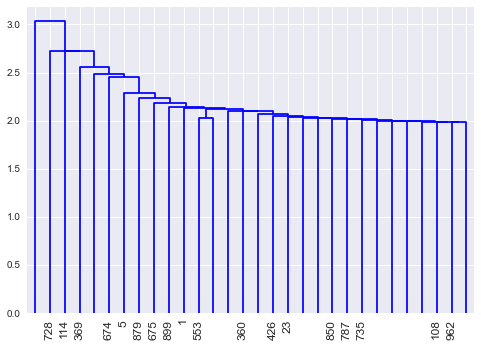

In [48]:
dendrogram(mat, 
           truncate_mode='lastp',
           color_threshold=1,
           labels=[],
           show_leaf_counts=False,
           leaf_rotation=90.,
           leaf_font_size=12,
           #show_contracted=True
          )
plt.show()

### Visualization

** PCA dimension reduction for 2-D visualization **

In [36]:
sample_ind = np.random.choice(fitted_df.shape[0], 1000)

In [37]:
sample_df = fitted_df[sample_ind, :]

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(sample_df)

In [39]:
dist.shape

(1000, 1000)

In [64]:
import os  # for os.path.basename
import matplotlib as mpl
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1, n_jobs=8)
#mds = PCA(n_components=2, random_state=1)
#mds = TSNE(n_components=2, perplexity=30, n_iter=1000, n_iter_without_progress=50)


pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

()
()


In [65]:
clusters = km.labels_[sample_ind].tolist()
colors = seaborn.color_palette("hls", 10)

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 
                  5: colors[0], 6:colors[2], 7:colors[4], 8:colors[6], 9:colors[8] }

#set up cluster names using a dict
cluster_names = {0: 'founder', 
                 1: 'analyst', 
                 2: 'representative', 
                 3: 'engineer', 
                 4: 'president', 
                 5: 'director',
                 6: 'team leader',
                 7: 'administrative',
                 8: 'sales',
                 9: 'manager'}

In [66]:
xs.shape, ys.shape

((2000,), (2000,))

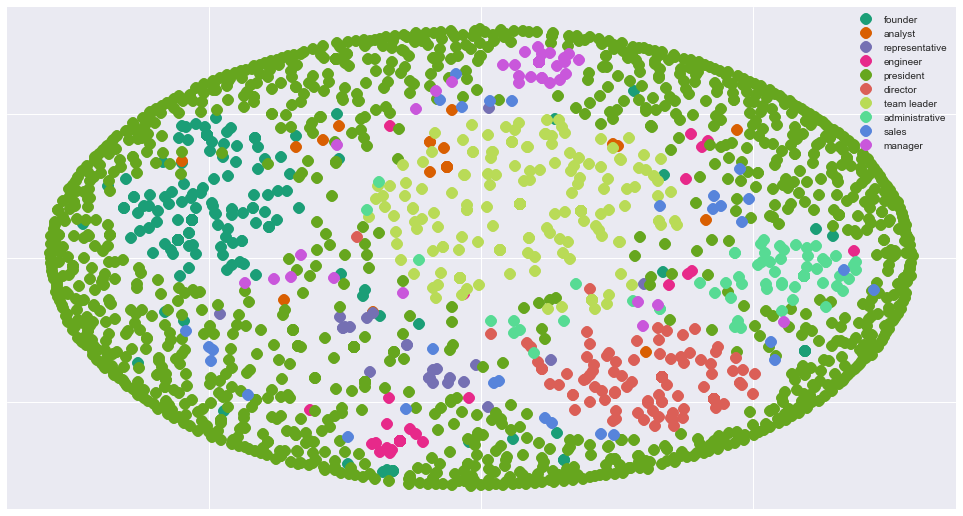

In [67]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], '', size=8)  

plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)